In [6]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#For Reading stock data from yahoo 
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf

yf.pdr_override()

In [8]:
#Let's use Yahoo and pandas to grab some data for some tech stocks
#The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year -1,end.month,end.day)

#For loop for grabing yahoo fincance data and setting as a dataframe
for stock in tech_list:
    #Set DataFrame as the Stock Ticker
    globals()[stock] = data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
#Note: Using globals() is a sloppy way of setting the DataFrame names, but its simple
#Let's Play around with AAPL DataFrame
#Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01
mean,232.996666,233.694074,232.278889,233.117037,214.454805,7.800781e+07
std,4.385903,4.380885,4.350809,4.304820,4.162566,1.929365e+07
min,225.039993,225.830002,223.880005,225.240005,206.871796,4.693970e+07
25%,228.820007,229.389999,228.460007,228.940002,210.270050,6.353280e+07
50%,234.380005,235.160004,233.580002,234.589996,215.918518,7.588080e+07
75%,236.699997,237.240005,235.740005,236.559998,217.457458,8.745450e+07
max,239.559998,240.320007,238.369995,239.779999,220.226044,1.491582e+08


In [10]:
#GENERAL INFO
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2017-01-03 to 2017-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       81 non-null     float64
 1   High       81 non-null     float64
 2   Low        81 non-null     float64
 3   Close      81 non-null     float64
 4   Adj Close  81 non-null     float64
 5   Volume     81 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.4 KB


In [11]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,206.871796,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,208.102493,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,207.937180,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,208.681076,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,207.992264,46939700


<AxesSubplot:xlabel='Date'>

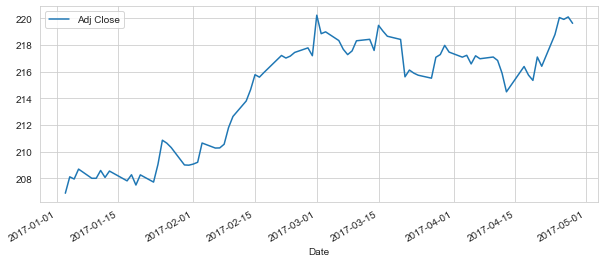

In [12]:
#Now that we've seen the dataFrame, let's go ahead and plot out the volumne and closing price of the stocks
#Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

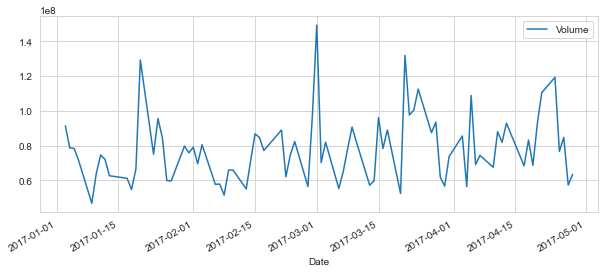

In [13]:
#Now let's plot the total volumne of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
#Let's calculate the moving average for the stock
#Luckily pandas has a built-in rolling mean calculator
#Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

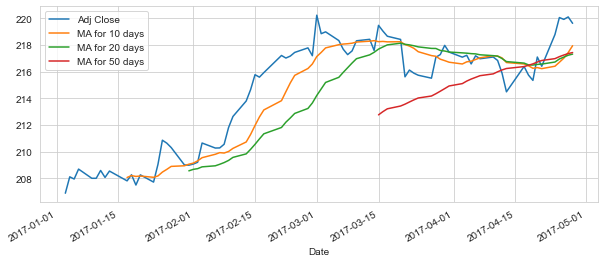

In [16]:
#Now let's plot all the additional Moving Averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

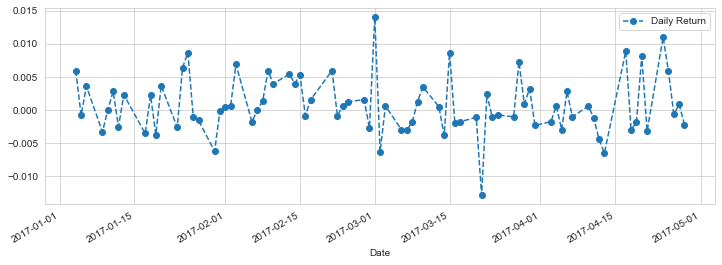

In [18]:
#Let's Analyze the risk of the stock.In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.
#We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return'>

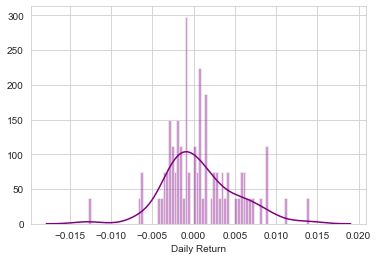

In [23]:
#Now let's get an overall look at the average daily return using histogram
sns.distplot(AAPL['Daily Return'].dropna(),bins=80,color='purple')


<AxesSubplot:>

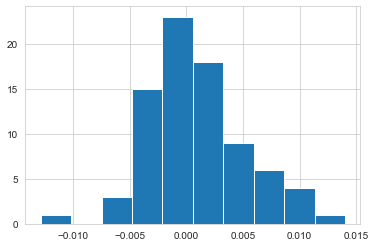

In [24]:
#or
AAPL['Daily Return'].hist()

In [31]:
#Now what if want to analyze the returns of all the stocks in our list?
#Let's go ahead and build a dataframe with all th ['Close'] columns for
#each of the stocks dataframes
#Grab all the closing prices for the tech stock list into one DataFrame
from pandas_datareader import data
closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [32]:
#let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-11-30,118.320580,3168.040039,1760.739990,212.290527
2020-12-01,121.968094,3220.080078,1798.099976,214.412735
2020-12-02,122.325890,3203.530029,1827.949951,213.579712
2020-12-03,122.186745,3186.729980,1826.770020,212.459106
2020-12-04,121.500984,3162.580078,1827.989990,212.578110


In [33]:
#Now we can compare the daily percentage return of two stocks to check how they are corelatd
#Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

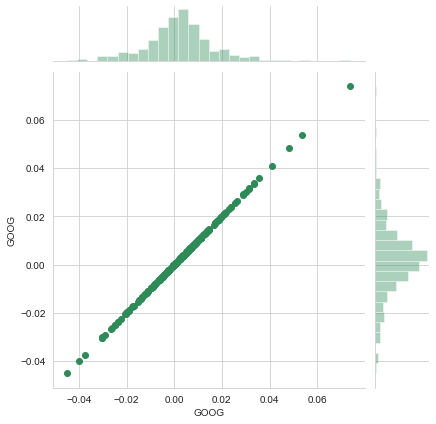

In [34]:
#Now we can compare the daily percentage return of two stocks to check how correated
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

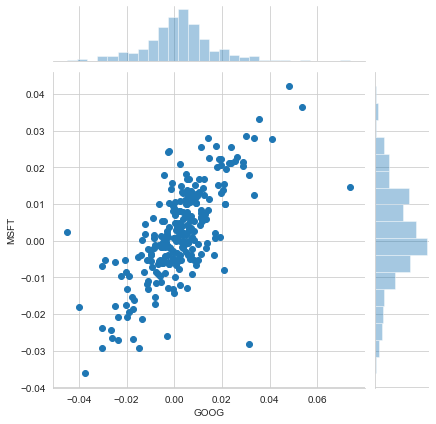

In [35]:
#So now we can see that if two stocks are perfectly corelated with each other
#a linear relationship b/w its daily return values should occur
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

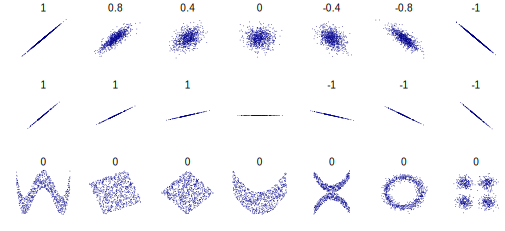

In [36]:
#Interesting, the pearson value offically know as the Pearson product-moment correlation coefficient)
#can give you a sense of how correlated the daily percentage returns are
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

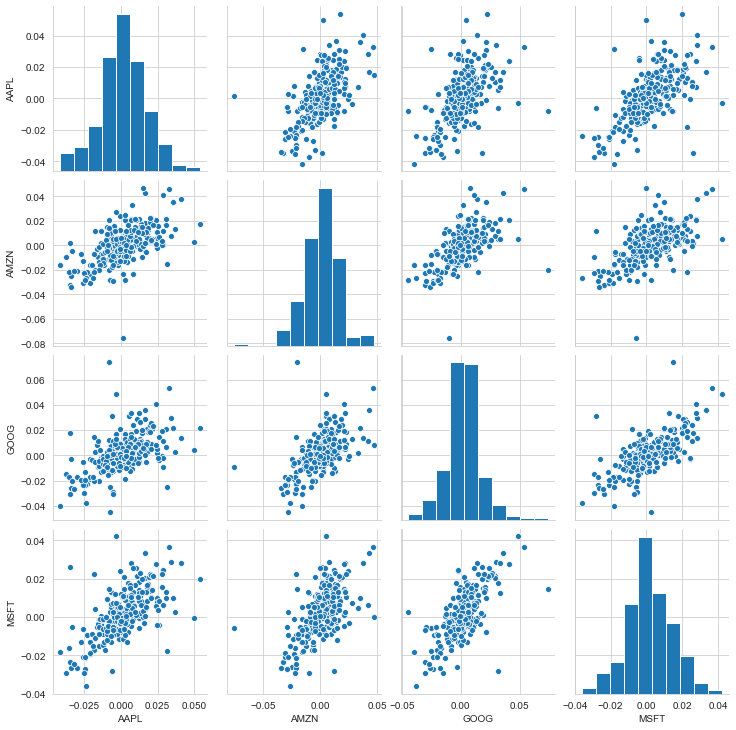

In [37]:
sns.pairplot(tech_rets.dropna())

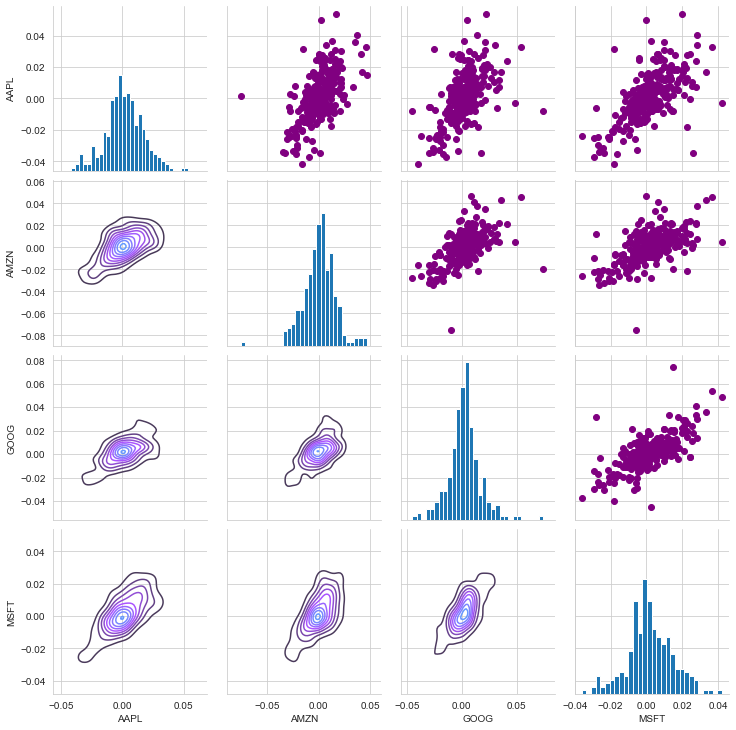

In [38]:
#Set up our figure by naming its returns_fig, call Pairplot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

#Using map_upper we can specify what the upper trianlge will look like
returns_fig.map_upper(plt.scatter,color='purple')

#We can also define the lower triangle in the figure, including the kde plot or the color map
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Finally we'll define the diagonal as a series of histogram plots
returns_fig.map_diag(plt.hist,bins=30)

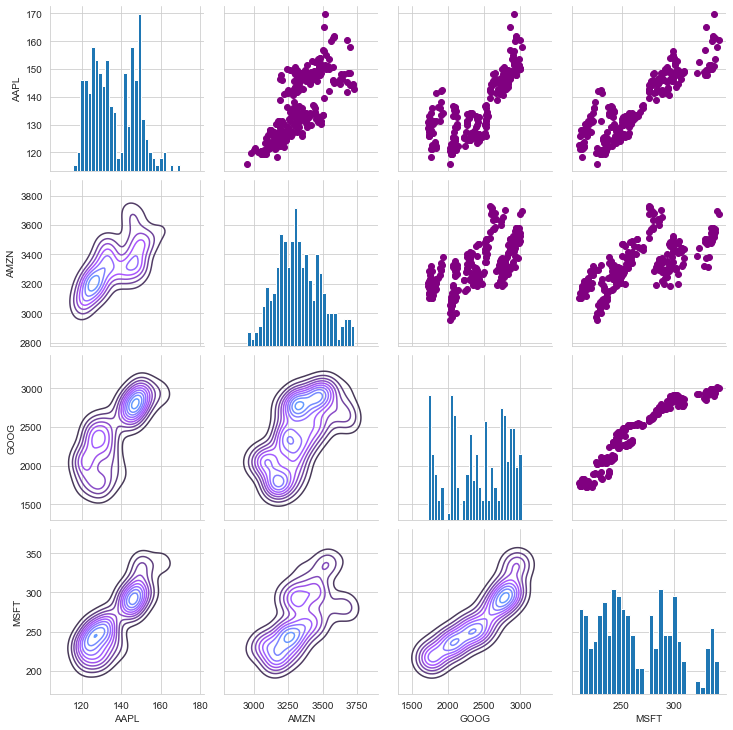

In [40]:
#We could have also analyzed the corelation of the closing price
#using tech exact same techniyq
#Set up our figure by naming it returns_fig, call Pairplot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

#Using map_upper we can specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


<AxesSubplot:ylabel='Date'>

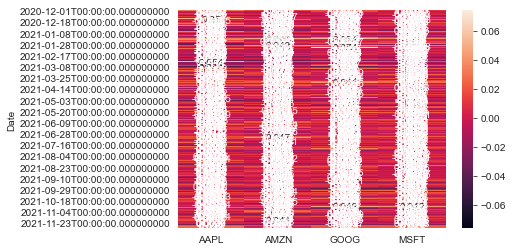

In [46]:
#Finally we could also do correlation plot, to get actual numerical values for the
#correlation b/w the stocks daily return values.By Comparing the closing prices
# we see an interesting relationship b/w Microsoft and Apple
sns.heatmap(tech_rets.dropna(),annot=True)

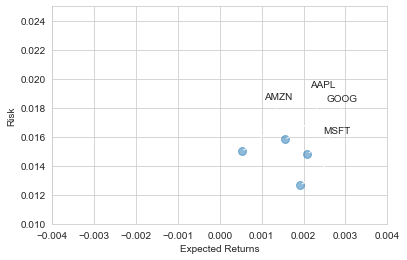

In [51]:
#Risk Analysis
#There are many ways we can quantify risk, one of the most basic ways using the information
#we've gathered on daily percentage returns is by comparing the
#expected return with the standard deviation of the daily returns
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.004,0.004])

#set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


<AxesSubplot:xlabel='Daily Return'>

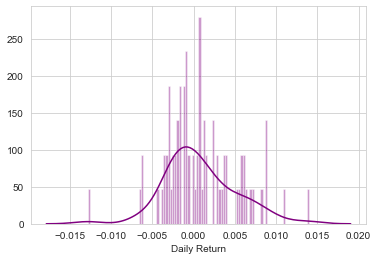

In [52]:
#Value at risk
#Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [60]:
#The 0.05 empirical quantile of daily retuns
rets['AAPL'].quantile(0.015)

-0.0348271892044339

In [61]:
#Value at risk using the Monte Carlo method
#to demonstrate a basic Monte Carlo method, we will start with just a few simulationd.
#First we'll define the vaiables e'll be using the google dataframe goog

#Set up our time horizon
days = 365

#now our delta
dt = 1/days

#now lets grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

#Now let's grab the velocity of the stock from the std() of the avg return
sigma = rets.std()['GOOG']

In [69]:
#Next we will create a function that takes in the starting price And num of days,
#and uses the sigma and mu we lready calculated
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
        

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

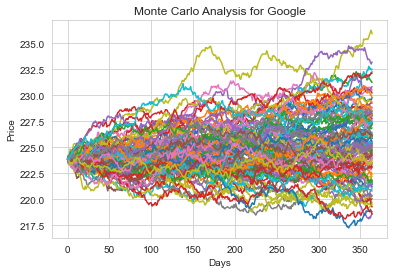

In [70]:
# Get start price from GOOG.head()
start_price = 223.88

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [71]:
#Let's go ahead and get a histogram of the end results for a much larger run
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

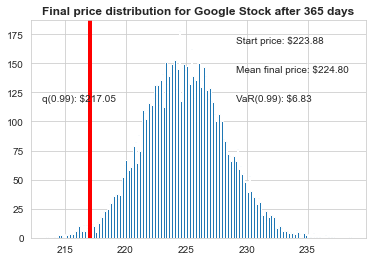

In [72]:
#Now that we have our array of simluations,let's plot histogram
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
